<a href="https://colab.research.google.com/github/fidanaydamirova/youtube_webscraping/blob/main/brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install fastai

In [11]:
from fastai.vision import *
from fastai.metrics import error_rate, accuracy
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Set path to root directory
path = Path('/content/drive/My Drive/ColabNotebooks/BrainTumor')
# View all files in directory
path.ls()

[PosixPath('/content/drive/My Drive/ColabNotebooks/BrainTumor/Testing'),
 PosixPath('/content/drive/My Drive/ColabNotebooks/BrainTumor/Training'),
 PosixPath('/content/drive/My Drive/ColabNotebooks/BrainTumor/models')]

In [13]:
# We are creating a fastai DataBunch from our dataset
# Preprocessing takes place when creating the databunch
# May need to decrease batch size and num_workers depending on GPU
data = ImageDataBunch.from_folder(path, train='Training', valid='Testing', ds_tfms=get_transforms(do_flip=False), size=224, bs=64, num_workers=8)

['meningioma_tumor', 'no_tumor', 'pituitary_tumor'] 3
2039 286


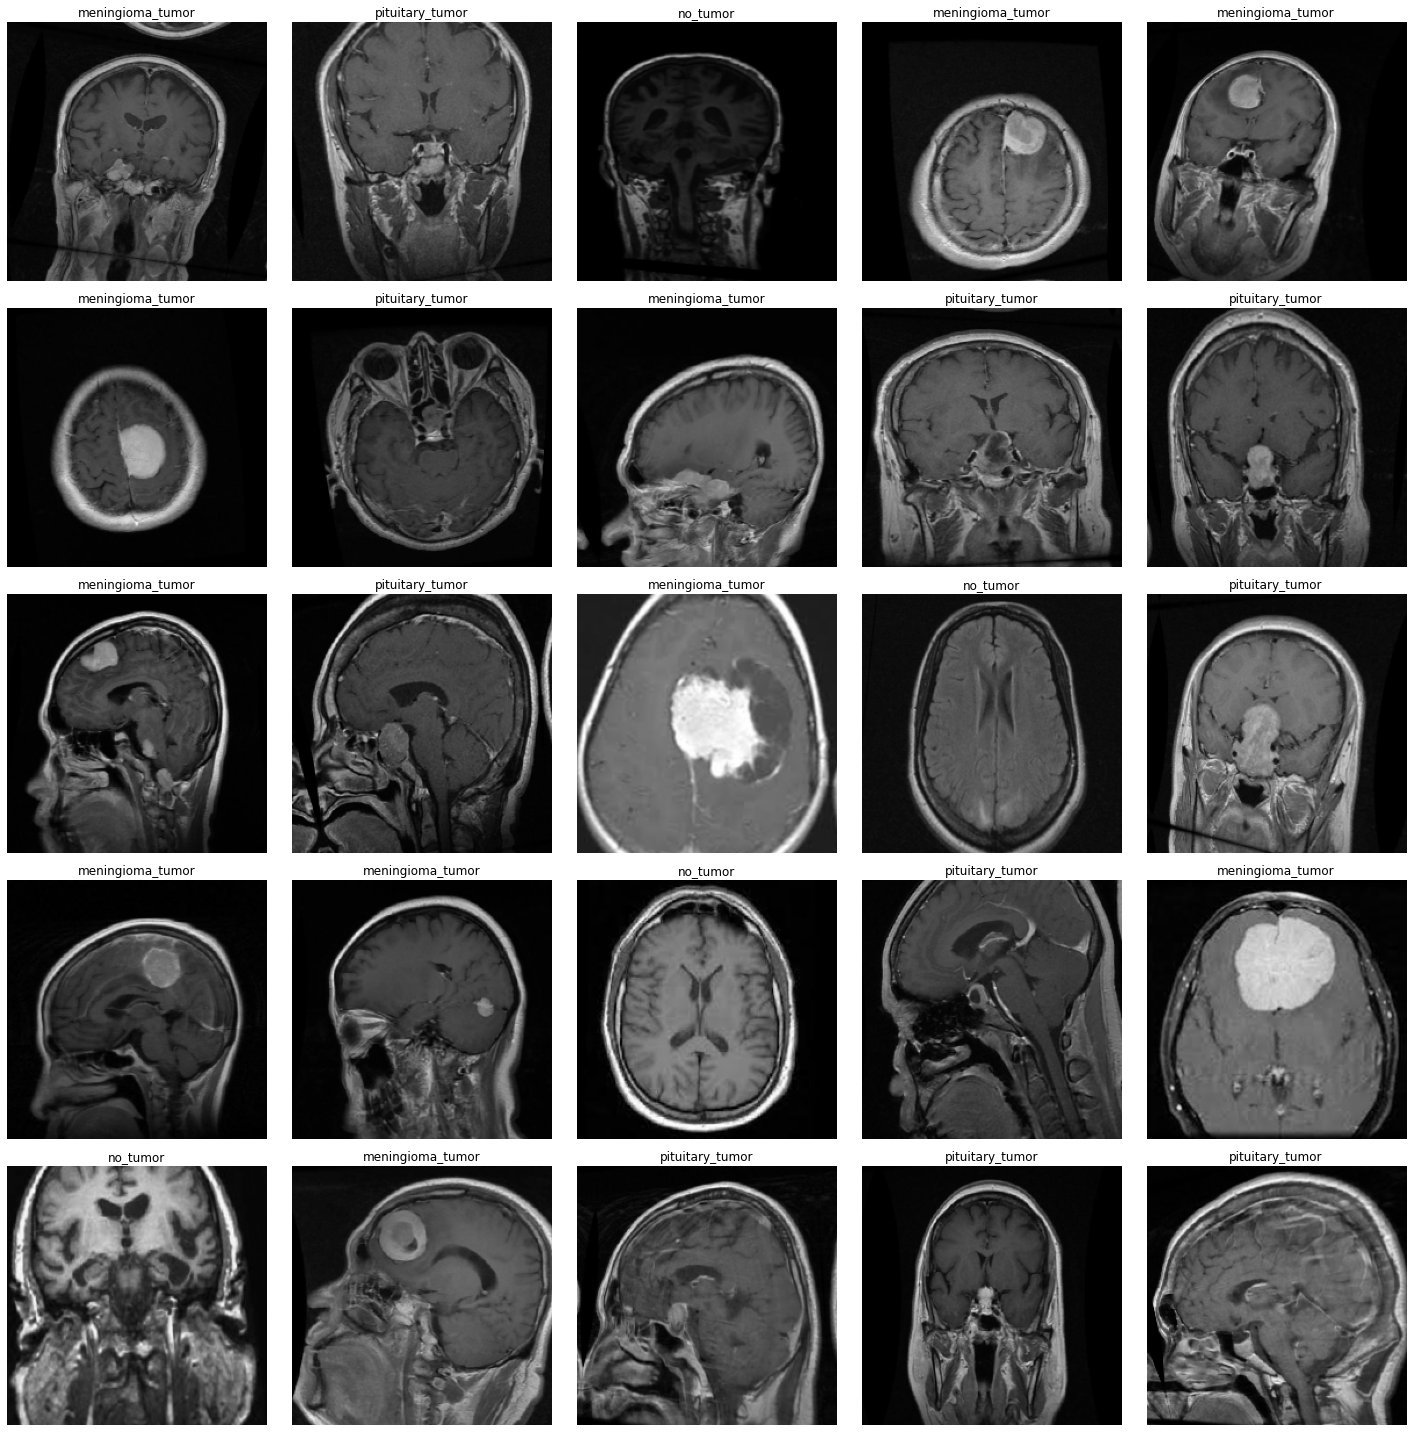

In [14]:
# Show what the data looks like after being transformed
data.show_batch()
# See the classes and count of classes in your dataset
print(data.classes,data.c)
# See the number of images in each data set
print(len(data.train_ds), len(data.valid_ds))

In [15]:
# Build the CNN model with the pretrained resnet34
# Error rate = 1 - accuracy
learn = cnn_learner(data, models.resnet34, metrics = [accuracy])
# Train the model on 11 epochs of data at the default learning rate
learn.fit_one_cycle(11)

epoch,train_loss,valid_loss,accuracy,time
0,1.113643,0.933465,0.636364,00:47
1,0.745879,0.710615,0.751748,00:47
2,0.577074,0.556313,0.839161,00:46
3,0.442762,0.470446,0.853147,00:47
4,0.358287,0.336027,0.895105,00:47
5,0.284627,0.272811,0.898601,00:47
6,0.243986,0.220747,0.944056,00:47
7,0.204024,0.252732,0.933566,00:47
8,0.178429,0.183630,0.954545,00:47
9,0.157392,0.159191,0.951049,00:47


In [16]:
# Save the model
learn.save('stage-1')
# Load the Model
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (2039 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
no_tumor,no_tumor,no_tumor,no_tumor,no_tumor
Path: /content/drive/My Drive/ColabNotebooks/BrainTumor;

Valid: LabelList (286 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
meningioma_tumor,meningioma_tumor,meningioma_tumor,meningioma_tumor,meningioma_tumor
Path: /content/drive/My Drive/ColabNotebooks/BrainTumor;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64,

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 4.79E-06
Min loss divided by 10: 1.32E-07


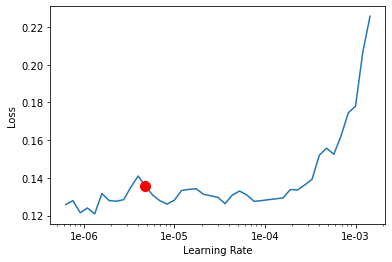

In [17]:
# Unfreeze all layers of the CNN
learn.unfreeze()
# Find the optimal learning rate and plot a visual
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [18]:
# Fit the model over 3 epochs
learn.fit_one_cycle(3, max_lr=slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.128924,0.160282,0.965035,00:49
1,0.129614,0.153787,0.954545,00:49
2,0.129155,0.162196,0.958042,00:49


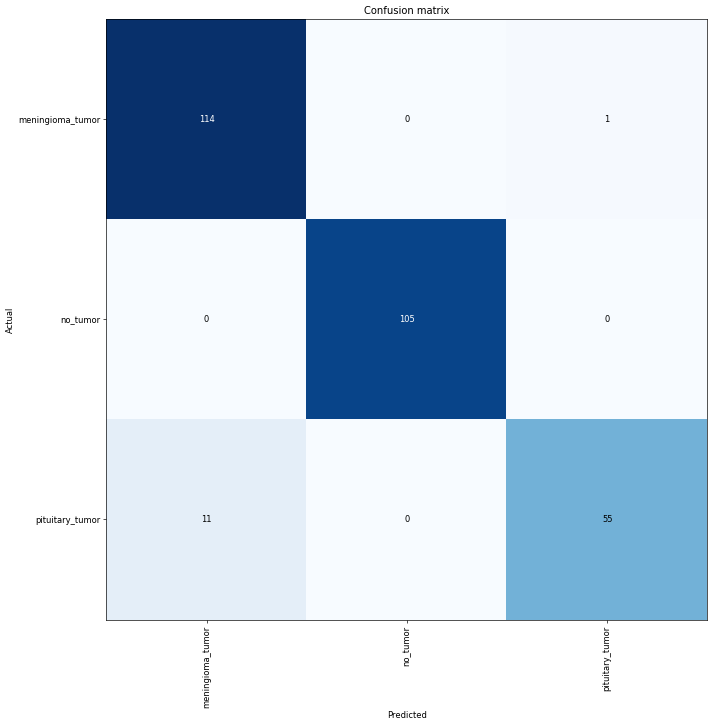

In [19]:
# Rebuild interpreter and replot confusion matrix
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [20]:
interp.most_confused(min_val=4)

[('pituitary_tumor', 'meningioma_tumor', 11)]

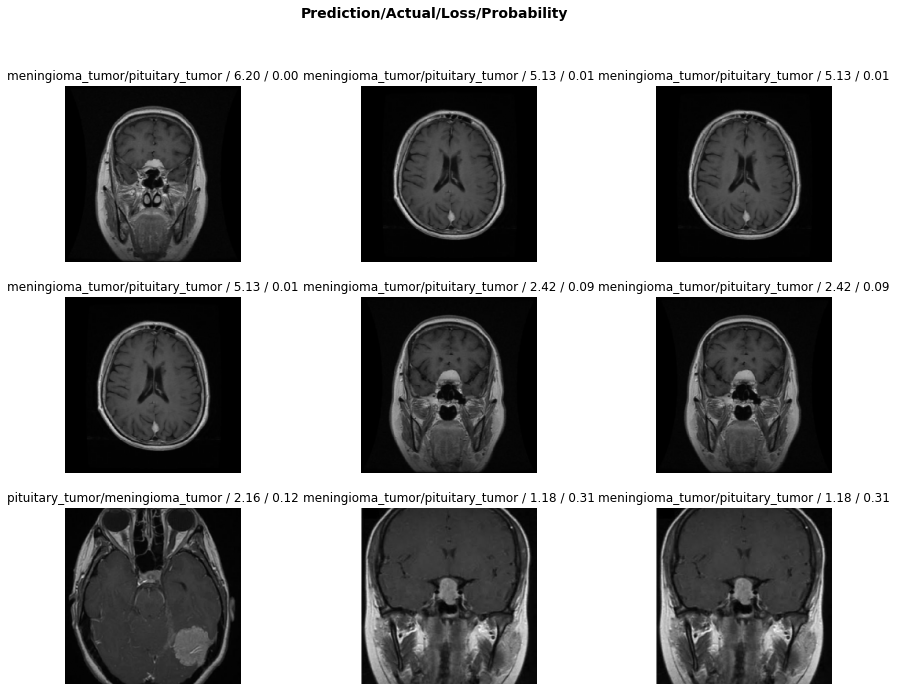

In [21]:
interp.plot_top_losses(9, figsize=(15,11))
